## Installing the required libraries . 
[Matplotlib - plotting
Pandas (exporting the csv) 
Scikit-learn to import metrics and packages]

In [ ]:
pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn_extra.cluster import KMedoids

## Mounting the CSV files on the Google drive to make it easy for importing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading the Country data CSV file 

In [ ]:
dc= pd.read_csv('/content/drive/MyDrive/CS564/Country-data.csv')
## Displaying the data
dc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Data Cleaning (Checking NULL or NAN values)

In [ ]:
## Checking Null Values 
print('NULL Value : ',dc.isnull().sum().sum())
## Checking NAN Values
print('NAN Value :',dc.isnull().sum().sum()) 

NULL Value :  0
NAN Value : 0


## Data Scaling

In [ ]:
## Drop the Country column for applying the Scaling
dc_no_country=dc.drop(['country'],axis=1)

scaling = MinMaxScaler()
dc_scaled=scaling.fit_transform(dc_no_country)
dc_scaled=pd.DataFrame(dc_scaled,columns=dc_no_country.columns)

In [ ]:
## Displaying the Scaled data
dc_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


## Using the Principal Component Analysis (PCA) for Dimensionality Reduction

In [ ]:
## Converting into 2 D data
mn = PCA(n_components=2)
pca_data = mn.fit_transform(dc_scaled)
dc_pca = pd.DataFrame(data = pca_data , columns = ['x', 'y'])

In [ ]:
dc_pca

,x,y,KMeans_Clusters,KMedoids_Clusters
0,-0.599078,0.095490,1,2
1,0.158474,-0.212092,0,0
2,0.003686,-0.135867,0,0
3,-0.650235,0.275975,1,2
4,0.200711,-0.064662,0,0
...,...,...,...,...
162,-0.160078,-0.029625,0,0
163,0.061133,-0.171339,0,0
164,0.115512,-0.032034,0,0
165,-0.332968,-0.019824,1,2


## Applying KMeans Clustering with no of Clusters as 3 for Under-developed,Developing and the developed countries

In [ ]:
## Applying the K-Means
pca_kmeans= KMeans(n_clusters = 3,random_state = 101)
## Fitting the data
pca_kmeans.fit(dc_pca)
pd.Series(pca_kmeans.labels_).value_counts()

## For each country,predicting the Cluster number
prediction = pca_kmeans.labels_
dc_pca_cluster=pd.DataFrame(dc_pca)
dc_cluster_data = pd.DataFrame(dc)
dc_cluster_data['KMeans_Clusters'] = prediction
dc_pca_cluster['KMeans_Clusters']=prediction


## Plotting the Clusters for 3 different types of countries for K-Means

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


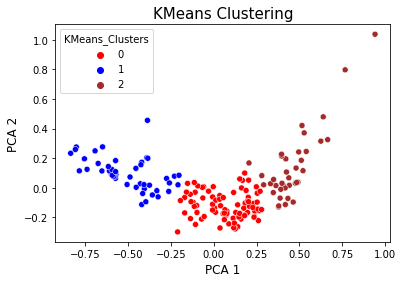

<Figure size 936x936 with 0 Axes>

In [ ]:
sns.scatterplot(dc_pca_cluster['x'],dc_pca_cluster['y'],hue='KMeans_Clusters',data=dc_pca_cluster,palette=['red','blue','brown'], legend='full') 
plt.title("KMeans Clustering",fontsize=15)
plt.xlabel("PCA 1", fontsize=12)
plt.ylabel("PCA 2", fontsize=12)
#plt.legend(["Under-developing","Developing","Developed"], loc ="upper left")
plt.figure(figsize=(13, 13))
plt.show()

## Calculating the Silhouette Score for Kmeans for 3 Clusters pertaining to the type of country

In [ ]:
print('Silhouette Score for K-Means :',metrics.silhouette_score(dc_pca, pca_kmeans.labels_))

Silhouette Score for K-Means : 0.8096802162196737


In [ ]:
## Displaying the list of all types of Countries
print('------------------------------------------------')
print("Number of Under Developing countries",len(dc_cluster_data[dc_cluster_data['KMeans_Clusters']==1]['country']))
print('Under Devloping Countries',list(dc_cluster_data[dc_cluster_data['KMeans_Clusters']==1]['country'])) 
print('------------------------------------------------')
print("Number of Developing countries",len(dc_cluster_data[dc_cluster_data['KMeans_Clusters']==0]['country']))
print('Developing Countries',list(dc_cluster_data[dc_cluster_data['KMeans_Clusters']==0]['country'])) 
print('------------------------------------------------')
print("Number of Developed countries",len(dc_cluster_data[dc_cluster_data['KMeans_Clusters']==2]['country']))
print('Developed Countries',list(dc_cluster_data[dc_cluster_data['KMeans_Clusters']==2]['country'])) 

------------------------------------------------
Number of Under Developing countries 46
Under Devloping Countries ['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia']
------------------------------------------------
Number of Developing countries 83
Developing Countries ['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',

## Applying K-mediods for 3 Clusters

In [ ]:
## Applying K-Mediod
dc_kmediod= KMedoids(n_clusters = 3,random_state = 111)
## Fitting the data
dc_kmediod.fit(dc_pca)
pd.Series(dc_kmediod.labels_).value_counts()

## For each country,predicting the Cluster number
prediction_med = dc_kmediod.labels_
dc_kmediod_data=pd.DataFrame(dc_pca)
dc_mediod_cluster = pd.DataFrame(dc)
dc_mediod_cluster['KMedoids_Clusters'] = prediction_med
dc_kmediod_data['KMedoids_Clusters']=prediction_med

## Plotting the Clusters for 3 different types of countries for K-Mediod

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


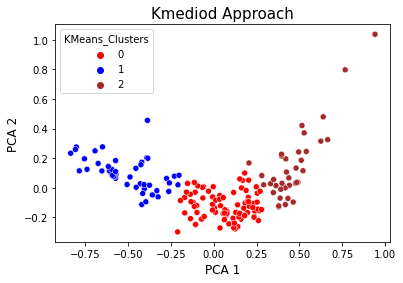

<Figure size 936x936 with 0 Axes>

In [ ]:
sns.scatterplot(dc_kmediod_data['x'],dc_kmediod_data['y'],hue='KMeans_Clusters',data=dc_kmediod_data,palette=['red','blue','brown'], legend='full') 
plt.title("Kmediod Approach",fontsize=15)
plt.xlabel("PCA 1", fontsize=12)
plt.ylabel("PCA 2", fontsize=12)
#plt.legend(["Under-developing","Developing","Developed"], loc ="upper left")
plt.figure(figsize=(13, 13))
plt.show()

## Calculating the Silhouette Score for Kmediod for 3 Clusters pertaining to the type of country

In [ ]:
print('Silhouette Score for K-Mediod :',metrics.silhouette_score(dc_pca, dc_kmediod.labels_))

Silhouette Score for K-Mediod : 0.8778148148528567


In [ ]:
## Displaying the list of all types of Countries
print('------------------------------------------------')
print("Number of Under Developing countries",len(dc_mediod_cluster[dc_mediod_cluster['KMedoids_Clusters']==2]['country']))
print('Under Devloping Countries',list(dc_mediod_cluster[dc_mediod_cluster['KMedoids_Clusters']==2]['country'])) 
print('------------------------------------------------')
print("Number of Developing countries",len(dc_mediod_cluster[dc_mediod_cluster['KMedoids_Clusters']==0]['country']))
print('Developing Countries',list(dc_mediod_cluster[dc_mediod_cluster['KMedoids_Clusters']==0]['country'])) 
print('------------------------------------------------')
print("Number of Developed countries",len(dc_mediod_cluster[dc_mediod_cluster['KMedoids_Clusters']==1]['country']))
print('Developed Countries',list(dc_mediod_cluster[dc_mediod_cluster['KMedoids_Clusters']==1]['country'])) 

------------------------------------------------
Number of Under Developing countries 46
Under Devloping Countries ['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia']
------------------------------------------------
Number of Developing countries 83
Developing Countries ['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',